!! pip install termcolor ## to color your words 

In [1]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk import PorterStemmer as stemmer
import string
import numpy as np 
from collections import Counter 
import string
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
import re
from gensim import corpora, models, similarities, matutils
from sklearn.feature_extraction.text import CountVectorizer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
import os
from sklearn.decomposition import NMF
from nltk.corpus import wordnet
from termcolor import colored
import gensim
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import metrics
from sklearn.preprocessing import Normalizer
from sklearn.cluster import KMeans
from gensim.utils import simple_preprocess
import spacy


description=pd.read_csv("cleaned_JD_test.csv", sep=",")
pd.options.display.max_columns = None
pd.options.display.max_rows = None
pd.options.display.max_colwidth=-1

In [2]:
description.head()

Unnamed: 0  \
0  0            
1  1            
2  2            
3  3            
4  4            

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            

In [3]:
description.columns

Index(['Unnamed: 0', 'job_description', 'job_title', 'experience',
       'cleaned_text', 'cleaned_noun_adj_review'],
      dtype='object')

In [4]:
description=description.drop(columns=['Unnamed: 0'])

In [5]:
description.head()

job_description  \
0  job summaryjob summary we are looking for an experienced senior data scientist with extensive predictive modeling and machine learning experience to join our analytics and insights team, which applies advanced data science ds, artificial intelligence ai and machine learning ml to produce solutions that drive marketing optimization and sales growth. using state of the art ai tools, ds platforms, ml libraries, and optimization tools, we leverage internal, external, online and offline data sources. the person in this role would be responsible for conducting data analysis and developing predictive models leveraging data science and machine learning to solve various business use cases, including marketing intelligence, customer segmentation, and predictive models for sales and marketing organization. we are looking for a candidate who will support our product, sales, leadership and marketing teams with insights gained from analyzing the company and external data. who can communicate with others with a statistical mindset, and can conduct exploratory analysis during data preparation and beyond. the ideal candidate is adept at using large data sets to find opportunities for product and process optimization and using models to test the effectiveness of different courses of action. they must have strong experience using a variety of data mining/data analysis methods, using a variety of data tools, building and implementing models, using/creating algorithms and creating/running simulations. they must have a proven ability to drive business results with their databased insights. they must be comfortable working with a wide range of stakeholders and functional teams. the right candidate will have a passion for discovering solutions hidden in large data sets and working with stakeholders to improve business outcomes.responsibilities and dutiesresponsibilities and duties understand the business problem in global b2b marketing and sales analytics domains to create value for the business, clients, customers, and providers, and identify critical questions that can be answered with ai or ds. scrub, clean, prepare and browse the data: fill in missing data values, determine outliers, regularize and normalize the data e.g., names, engineer features, and transform it into a more useful form. explore and visualize the data using tools such as python modules including pandas, matplotlib, bokeh, and seaborn, tableau, and looker. build, evaluate, and document the models generate plausible explanations for presentation to stakeholders and deployment. communicate results and ideas to key decisionmakers work with data engineers to deploy the models, build data pipelines, and scalable systems. work with stakeholders to identify opportunities for leveraging company data to drive business analytics solutions. research and develop statistical learning models for data analysis identify valuable data sources and automate collection processes undertake preprocessing of structured and unstructured data analyze large amounts of information to discover trends and patterns build predictive models and machinelearning algorithms present information using data visualization techniques collaborate with sales, marketing, and senior executive teamsqualifications and skillsrequired experience, skills and qualifications minimum 35 years of relevant experience ms/ph.d. in computer science, math, statistics, or in any technical field that provides a solid basis for analytics or equivalent work experience excellent understanding/experience with leading machine learning methods such as neural networks, deep learning, knn, naive bayes, svm, lasso regression, elastic net regression, boosting and bagging random forest, xgboost, association rules, crossvalidation method, and unsupervised learning and their realworld advantages/drawbacks. knowledge and experience in statistical and data mining techniques: glm/regression, random forest, boosting, trees, text min

### let me try to clean the job titles too

In [6]:
import os
from wordcloud import WordCloud
import string
from nltk.corpus import stopwords
from nltk import PorterStemmer as Stemmer

from sklearn.feature_extraction.text import TfidfVectorizer

pd.set_option('max_colwidth', 100)
import numpy as np
from PIL import Image
%matplotlib inline
import spacy


In [7]:
from collections import Counter 
def getMostCommon(jd,topn=20):
    jds=" ".join(jd)
    tokenised_jd=jds.split(" ")
    
    
    freq_counter=Counter(tokenised_jd)
    return freq_counter.most_common(topn)
    

In [8]:
jt=description['job_title'].tolist()

In [9]:
jt

['Data Scientist',
 'Intermediate analyst - business analytics',
 'Senior Business Analyst',
 'Business Analytics Consultant',
 'Manager | Senior Business Analytics Manager',
 'Business Analytics consultant (Advance Analytics)',
 'Analytics Practice Lead - Business Analytics',
 'Business Analytics Internship',
 'Head - Business Analytics',
 'Senior Business Analytics',
 'Senior Data Scientist',
 'Business Analytics Cons 2',
 'Concur-Business Analyst',
 'Business Analyst/ Manager',
 'Business Analyst - Ad Tech',
 'SAAS DEVELOPER',
 'Decision Scientist',
 'Principal Architect – Digital',
 'Digital Marketing Intern',
 'ETL Developer',
 'Data Scientist',
 'Business Analyst (Finance Domain)',
 'Business Analyst/ Manager',
 'Pentaho Developer',
 'Senior JAVA developer',
 'Senior Business Analyst',
 'Senior Business Analyst',
 'Software Developer 3',
 'Data Scientist',
 'Data Engineering',
 'Sales Manager',
 'Senior Data Scientist',
 'Data Scientist',
 'Data Engineer / Backend Developer',
 'A

In [10]:
top_20_ba_titles=getMostCommon(jt,30)
top_20_ba_titles


[('Manager', 206),
 ('Business', 197),
 ('Senior', 190),
 ('Data', 165),
 ('-', 149),
 ('Analyst', 121),
 ('Scientist', 119),
 ('Marketing', 72),
 ('Engineer', 66),
 ('Analyst/', 64),
 ('Analytics', 55),
 ('Digital', 50),
 ('Intern', 45),
 ('Software', 41),
 ('Developer', 38),
 ('Lead', 36),
 ('Optimization', 36),
 ('&', 34),
 ('Inv', 34),
 ('Associate', 28),
 ('and', 25),
 ('Sales', 23),
 ('Sr', 23),
 ('Assistant', 23),
 ('Management', 23),
 ('Development', 20),
 ('Product', 18),
 ('BI', 16),
 ('Financial', 15),
 ('Executive', 14)]

In [11]:
def generateNGram(text,n):
    tokens=text.split(" ")
    ngrams = zip(*[tokens[i:] for i in range(n)])
    return ["_".join(ngram) for ngram in ngrams]

In [12]:
BA_bigrams=[" ".join(generateNGram(review,2)) for review in jt]

In [13]:
BA_bigrams

['Data_Scientist',
 'Intermediate_analyst analyst_- -_business business_analytics',
 'Senior_Business Business_Analyst',
 'Business_Analytics Analytics_Consultant',
 'Manager_| |_Senior Senior_Business Business_Analytics Analytics_Manager',
 'Business_Analytics Analytics_consultant consultant_(Advance (Advance_Analytics)',
 'Analytics_Practice Practice_Lead Lead_- -_Business Business_Analytics',
 'Business_Analytics Analytics_Internship',
 'Head_- -_Business Business_Analytics',
 'Senior_Business Business_Analytics',
 'Senior_Data Data_Scientist',
 'Business_Analytics Analytics_Cons Cons_2',
 'Concur-Business_Analyst',
 'Business_Analyst/ Analyst/_Manager',
 'Business_Analyst Analyst_- -_Ad Ad_Tech',
 'SAAS_DEVELOPER',
 'Decision_Scientist',
 'Principal_Architect Architect_– –_Digital',
 'Digital_Marketing Marketing_Intern',
 'ETL_Developer',
 'Data_Scientist',
 'Business_Analyst Analyst_(Finance (Finance_Domain)',
 'Business_Analyst/ Analyst/_Manager',
 'Pentaho_Developer',
 'Senior_J

In [14]:
def plotMostCommonWords(reviews_list,topn=50,title="Positive Review",color="blue",axis=None):
    top_words=getMostCommon(reviews_list,topn=topn)
    data=pd.DataFrame()
    data['words']=[val[0] for val in top_words]
    data['freq']=[val[1] for val in top_words]
    if axis!=None:
        sns.barplot(y='words',x='freq',data=data,color=color,ax=axis).set_title(title+" top "+str(topn))
    else:
        sns.barplot(y='words',x='freq',data=data,color=color).set_title(title+" top "+str(topn))

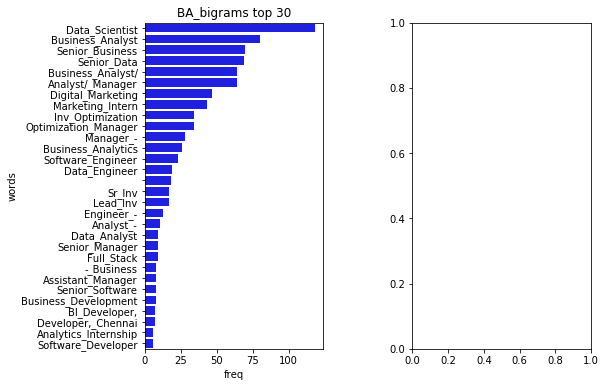

In [15]:
from matplotlib import rcParams

import matplotlib.pyplot as plt
import seaborn as sns

import re

rcParams['figure.figsize'] = 8,6 ## Sets the heigth and width of image


fig,ax=plt.subplots(1,2)
fig.subplots_adjust(wspace=0.5) #Adjusts the space between the two plots
plotMostCommonWords(BA_bigrams,30,"BA_bigrams",axis=ax[0])



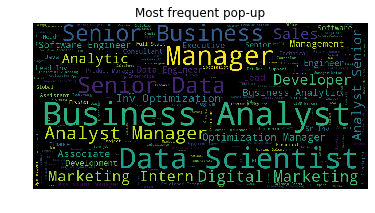

In [16]:
import numpy as np
from PIL import Image
%matplotlib inline
maskArray = np.array(Image.open("Bird.png"))
wordcloud = WordCloud(height=2000, width=2000,mask = maskArray, background_color='Black')
wordcloud = wordcloud.generate(' '.join(description["job_title"].tolist()))

plt.title("Most frequent pop-up")
plt.imshow(wordcloud)
wordcloud.to_file("job_titles.png")
plt.axis('off')
plt.show()

### let me see the difference between the senior business Analyst and business analyst /Manager

In [17]:
description['job_title'].value_counts()

Senior Business Analyst                                            64
Business Analyst/ Manager                                          64
Senior Data Scientist                                              63
Data Scientist                                                     51
Digital Marketing Intern                                           43
Lead Inv Optimization Manager                                      17
Sr Inv Optimization Manager                                        17
Business Analyst                                                    7
Business Analytics Internship                                       6
Senior Software Engineer                                            4
Senior BI Developer, Chennai                                        4
Senior Manager Total Rewards                                        3
Data Engineer                                                       3
Senior Data Engineer                                                3
BI Developer, Chenna

In [18]:
Senior_BA=description.loc[description["job_title"]=='Senior Business Analyst','cleaned_text'].tolist()
Senior_BA[0:5]


['p&g found year simple soap candle company today be world large consumer good company home iconic trust brand make life little bit easy small meaningful way have span century thank simple idea leadership innovation insight innovation passion hardworking team help grow global company govern open transparent support good cause protect environment place proud work do mattersabout role business analyst ba p&g authority group belong analytics insight department ba provide expertise proficiency database analytic consumer retailer market understanding insight core work identify activate growth opportunity brand country/ trade channels/ specific retailer level do outstanding analytic deep insight base datum advanced analytic statistical tool analytic combination insight foresight business analyst deliver p&g business goal use datum analytic derive actionable consumer business insightskey responsibility embed data analytic decision p&g monthly business process base external datum e.g. market s

In [19]:
len(Senior_BA)

64

In [20]:
Business_AM=description.loc[description["job_title"]=='Business Analyst/ Manager','cleaned_text'].tolist()


In [21]:
len(Business_AM)

64

In [22]:
from collections import Counter 


def getMostCommon(jd,topn):
    jds=" ".join(jd)
    tokenised_jd=jds.split(" ")
    
    
    freq_counter=Counter(tokenised_jd)
    return freq_counter.most_common(topn)

In [23]:
top_30_BAM_jd_words=getMostCommon(Business_AM,30)

top_30_SBA_jd_words=getMostCommon(Senior_BA,30)

In [24]:
sba_words=[val[0] for val in top_30_SBA_jd_words]
bam_words=[val[0] for val in top_30_BAM_jd_words]

set(sba_words) - set(bam_words)

{'analyst',
 'analytic',
 'ba',
 'base',
 'brand',
 'care',
 'company',
 'consumer',
 'database',
 'datum',
 'do',
 'environment',
 'help',
 'idea',
 'innovation',
 'insight',
 'life',
 'opportunity',
 'p&g',
 'retailer',
 'science',
 'simple',
 'support',
 'today',
 'trade',
 'value',
 'will'}

So in the set of Senior Business Analyst it tells there is more distinct words is "analyst, innovation, insights, science, data, datum,environmnet"

In [25]:
set(bam_words)- set(sba_words)

{'attentive',
 'case',
 'client',
 'communication',
 'degree',
 'descriptionsutherland',
 'detailed',
 'develop',
 'development',
 'document',
 'ensure',
 'experience',
 'functional',
 'job',
 'lead',
 'meet',
 'practice',
 'problem',
 'relationship',
 'requirement',
 'seek',
 'skill',
 'software',
 'solution',
 'solve',
 'use',
 '’s'}

So in the set of Business Analyst/ Manager it tells there is more distinct words are "communication, development, documentation, relationship, solution"

In [26]:
def generateNGram(text,n=2):
    tokens=text.split(" ")
    ngrams = zip(*[tokens[i:] for i in range(n)])
    return ["_".join(ngram) for ngram in ngrams]

In [27]:
SBA_bigrams=[" ".join(generateNGram(review)) for review in Senior_BA]
BAM_bigrams=[" ".join(generateNGram(review)) for review in Business_AM]


In [28]:
top_30_BAM_jd_bigrams=getMostCommon(Business_AM,30)

top_30_SBA_jd_bigrams=getMostCommon(Senior_BA,30)

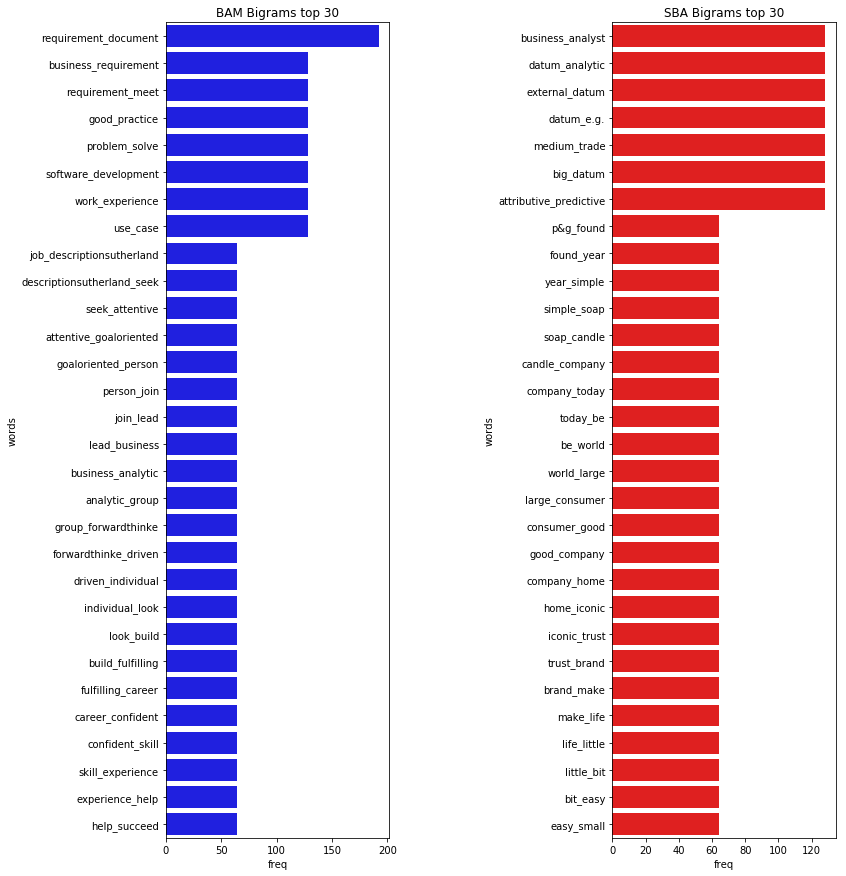

In [29]:
rcParams['figure.figsize'] = 12,15
fig,ax=plt.subplots(1,2)
fig.subplots_adjust(wspace=1) #Adjusts the space between the two plots
plotMostCommonWords(BAM_bigrams,30,"BAM Bigrams",axis=ax[0])

plotMostCommonWords(SBA_bigrams,30,"SBA Bigrams",color="red",axis=ax[1])

In [30]:
BAM_trigrams=[" ".join(generateNGram(tweet,3)) for tweet in Business_AM]
SBA_trigrams=[" ".join(generateNGram(tweet,3)) for tweet in Senior_BA]


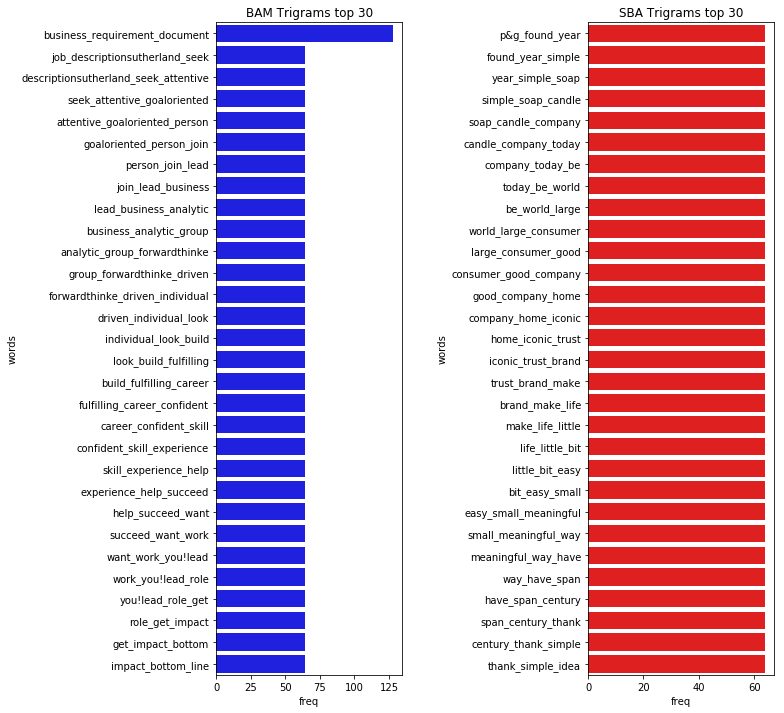

In [31]:
rcParams['figure.figsize'] = 10,12
fig,ax=plt.subplots(1,2)
fig.subplots_adjust(wspace=1)       ### combination of threewords in a tweets
plotMostCommonWords(BAM_trigrams,30,"BAM Trigrams",axis=ax[0])

plotMostCommonWords(SBA_trigrams,30,"SBA Trigrams",color="red",axis=ax[1])

In [32]:
description['cleaned_noun_adj_review'][0]

'job summaryjob summary looking experienced senior data scientist extensive predictive modeling machine learning experience join analytics insights team applies advanced data science ds artificial intelligence ai machine learning produce solutions drive marketing optimization sales growth using state art ai tools ds platforms ml libraries optimization tools leverage internal external online offline data sources person role responsible conducting data analysis developing predictive models leveraging data science machine learning solve various business use cases including marketing intelligence customer segmentation predictive models sales marketing organization looking candidate support product sales leadership marketing teams insights gained analyzing company external data communicate others statistical mindset conduct exploratory analysis data preparation ideal candidate adept using large data sets find opportunities product process optimization using models test effectiveness differe

### let me add the stopwords

In [33]:
stop_list = stopwords.words('english')+['us']

not_stopwords = {'do','does','could','did','had','will','not',"didn't","doesn't","don't","couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't",'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"} 
stop_list = set([word for word in stop_list if word not in not_stopwords])
#as few stop words will be useful in our analysis ,those are excluded from the stoplist

In [34]:
def clean_text(text):
    Stopwords=stop_list
    test_line=text
    test_line_cleaned="".join([x for x in test_line if x not in string.punctuation])
    test_line_cleaned=test_line_cleaned.lower()
    test_tokens=test_line_cleaned.split(" ")
    test_tokens=[token for token in test_tokens if token not in Stopwords]
    ps = Stemmer() 
    test_line_cleaned=" ".join([ps.stem(token) for token in test_tokens])
    return test_line_cleaned

In [35]:
description["cleaned_text"]=description["job_description"].apply(lambda text: clean_text(text))

## Common Words

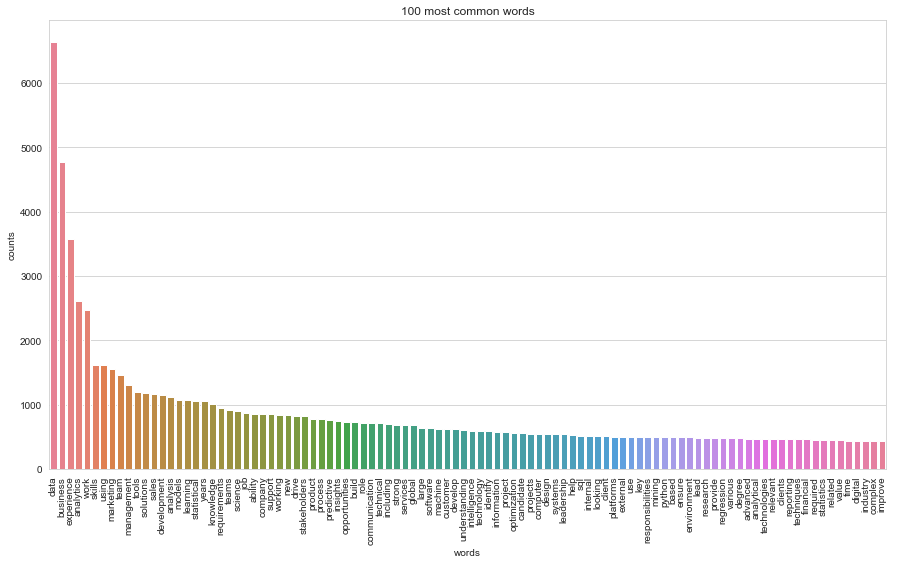

In [36]:
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
# Helper function
def plot_10_most_common_words(count_data, count_vectorizer):
    import matplotlib.pyplot as plt
    words = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:100]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words)) 
    
    plt.figure(2, figsize=(15, 15/1.8180))
    plt.subplot(title='100 most common words')
    sns.set_context("notebook", font_scale=1.0, rc={"lines.linewidth": 0.5})
    sns.barplot(x_pos, counts, palette='husl')
    plt.xticks(x_pos, words, rotation=90) 
    plt.savefig("common_word_100_1.png") #to save your plot
    plt.xlabel('words')
    plt.ylabel('counts')
    plt.show()
# Initialise the count vectorizer with the English stop words
count_vectorizer = CountVectorizer(stop_words='english')
# Fit and transform the processed titles
count_data = count_vectorizer.fit_transform(description['cleaned_noun_adj_review'])
# Visualise the 15 most common words
plot_10_most_common_words(count_data, count_vectorizer)

In [37]:
import warnings
warnings.simplefilter("ignore", DeprecationWarning)
# Load the LDA model from sk-learn
from sklearn.decomposition import LatentDirichletAllocation as LDA
from sklearn.decomposition import TruncatedSVD
# Helper function
def print_topics(model, count_vectorizer, n_top_words):
    words = count_vectorizer.get_feature_names()
    for topic_idx, topic in enumerate(model.components_):
        print("\nTopic #%d:" % topic_idx)
        print(" ".join([words[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
        
# Tweak the two parameters below
number_topics = 10
number_words = 50
# Create and fit the LDA model
lda = LDA(n_components=number_topics, n_jobs=-1)
lda.fit(count_data)
# Print the topics found by the LDA model
print(colored("Topics found via LDA:",'green'))
print_topics(lda, count_vectorizer, number_words)

# Build a Non-Negative Matrix Factorization Model
nmf_model = NMF(n_components=number_topics)
nmf_model.fit(count_data)
print('\n')
print (colored("Topics found via nmf_Z:",'red'))
print_topics(nmf_model, count_vectorizer, number_words)

print('\n')
print (colored("Topics found via lsi_Z:",'yellow'))
# Build a Latent Semantic Indexing Model
lsi_model = TruncatedSVD(n_components=number_topics)
lsi_Z = lsi_model.fit(count_data)
print_topics(lsi_Z, count_vectorizer, number_words)


Topics found via LDA:

Topic #0:
business management team sales experience financial deloitte services work analytics skills new working key job support global people drive analysis performance company development provide leadership operations finance reporting ability teams strategic process planning risk role client clients help including knowledge stakeholders develop ensure opportunities market service communication manager senior manage

Topic #1:
data experience using models learning business marketing statistical sales analytics predictive tools analysis machine insights large regression stakeholders drive work science ai mining intelligence skills solutions sets candidate optimization teams platforms techniques build years identify ds methods advanced python variety computer information working product tableau sql looking results opportunities communicate

Topic #2:
business data experience analytics management work technical solutions skills years team development design requi

## creating Clusters using K-Means

In [38]:
tf_idf = TfidfVectorizer(stop_words='english', ngram_range=(1, 4), min_df=25, max_df=0.98)
tf_idf_vecs = tf_idf.fit_transform(description['cleaned_noun_adj_review'])

lsa = TruncatedSVD(100, algorithm='arpack')
lsa_vecs = lsa.fit_transform(tf_idf_vecs)
lsa_vecs = Normalizer(copy=False).fit_transform(lsa_vecs)
feature_names = tf_idf.get_feature_names()
lsa_df = pd.DataFrame(lsa.components_.round(5), columns=feature_names)

km = KMeans(n_clusters=15, init='k-means++')
km.fit(lsa_vecs)
clusters = km.predict(lsa_vecs)

km.cluster_centers_.shape

original_space_centroids = lsa.inverse_transform(km.cluster_centers_)
original_space_centroids.shape

order_centroids = original_space_centroids.argsort()[:, ::-1]
order_centroids.shape

for cluster in range(10):
    features = order_centroids[cluster,0:15]
    print('Cluster {}\n'.format(cluster))
    for feature in features:
        print(feature_names[feature])
    print('\n')

Cluster 0

status
data
insurance
gender
management
contact
years
view
disability
experience
job
team
veteran
sexual orientation
sexual


Cluster 1

supply chain
chain
supply
inventory
target
target supply chain
target supply
data
ipc
simulation
algorithmic
planning
planning control
inventory planning
inventory planning control


Cluster 2

requirements
requirements met
work
development
ensure
capturing
met
gathering
detailed
best practices
business requirements
software development
problem solving
work experience
practices


Cluster 3

data
management
experience
analytics
project
team
skills
quality
work
analysis
teams
requirements
solutions
customer
operations


Cluster 4

financial
risk
finance
accounting
management
reporting
banking
team
global
analysis
services
planning
working
experience
corporate


Cluster 5

data
insight
innovation
trade
care
simple
ll
analytics
consumer
data analytics
work
company
attributive
attributive predictive
media trade


Cluster 6

data
using
models
lea

In [39]:
tf_idf = TfidfVectorizer(stop_words= stop_list, ngram_range=(1, 4), min_df=25, max_df=0.98)
tf_idf_vecs = tf_idf.fit_transform(description['cleaned_noun_adj_review'])

In [40]:
tf_idf_vecs

<893x5714 sparse matrix of type '<class 'numpy.float64'>'
	with 449253 stored elements in Compressed Sparse Row format>

In [41]:
print(tf_idf.get_feature_names()[0:200])

['15th', '15th jan', '15th jan 29th', '15th jan 29th jan', '20are', '20are available', '20are available duration', '20are available duration monthshave', '29th', '29th jan', '29th jan 20are', '29th jan 20are available', 'abilities', 'ability', 'ability communicate', 'ability develop', 'ability develop attributive', 'ability develop attributive predictive', 'ability drive', 'ability drive business', 'ability drive business results', 'ability query', 'ability query analyze', 'ability query analyze data', 'ability work', 'ability work diverse', 'ability work diverse organizations', 'able', 'able align', 'able align leadership', 'able align leadership vision', 'academic', 'accelerate', 'accelerate business', 'accelerate business improve', 'accelerate business improve media', 'accept', 'access', 'access languages', 'access languages sql', 'access languages sql storage', 'accordance', 'account', 'accountability', 'accounting', 'accounts', 'accredited', 'accredited reputed', 'accredited reput

In [42]:
print(len(tf_idf.get_feature_names()))

5714


In [43]:

COUNT=0
def extract_allowed_pos(text,allowed_pos=['NOUN',"PROPN","ADJ"]):
    global COUNT
    
    text=re.sub(r'[^\x00-\x7F]+',' ', text) ## Remove Ascii Characters
    text=re.sub('\s+', ' ', text).strip()
    
    nlp = spacy.load("en_core_web_sm", disable=['parser', 'ner']) 
    
    text=text.lower()
    
    document = nlp(text)
    
    doc_cleaned=[token.text for token in document if token.pos_ in allowed_pos]
    #print(doc_cleaned)
    doc_cleaned=" ".join(doc_cleaned)
    #print(doc_cleaned)
    #print(doc_cleaned)
    COUNT=COUNT+1
    if COUNT%1000==0:
        print(COUNT)
    return doc_cleaned

In [44]:
description['cleaned_text_3']=description["job_description"].apply(lambda x:extract_allowed_pos(x))

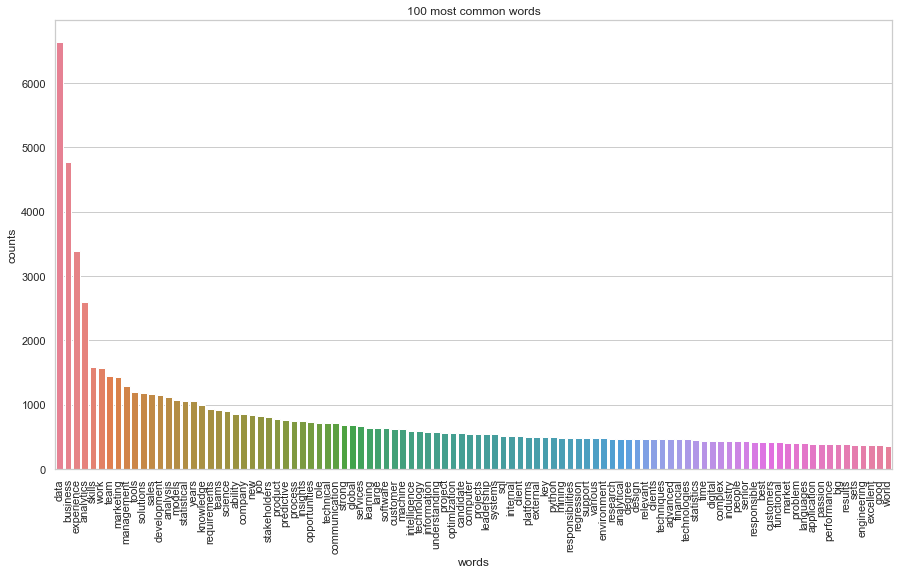

In [45]:
# Initialise the count vectorizer with the English stop words
count_vectorizer = CountVectorizer(stop_words='english')
# Fit and transform the processed titles
count = count_vectorizer.fit_transform(description['cleaned_text_3'])
# Visualise the 15 most common words
plot_10_most_common_words(count, count_vectorizer)

In [46]:
tf_idf = TfidfVectorizer(stop_words='english', ngram_range=(1, 4), min_df=25, max_df=0.98)
tf_idf_vecs = tf_idf.fit_transform(description['cleaned_text_3'])

lsa = TruncatedSVD(100, algorithm='arpack')
lsa_vecs = lsa.fit_transform(tf_idf_vecs)
lsa_vecs = Normalizer(copy=False).fit_transform(lsa_vecs)
feature_names = tf_idf.get_feature_names()
lsa_df = pd.DataFrame(lsa.components_.round(5), columns=feature_names)

km = KMeans(n_clusters=15, init='k-means++')
km.fit(lsa_vecs)
clusters = km.predict(lsa_vecs)

km.cluster_centers_.shape

original_space_centroids = lsa.inverse_transform(km.cluster_centers_)
original_space_centroids.shape

order_centroids = original_space_centroids.argsort()[:, ::-1]
order_centroids.shape

for cluster in range(10):
    features = order_centroids[cluster,0:15]
    print('Cluster {}\n'.format(cluster))
    for feature in features:
        print(feature_names[feature])
    print('\n')

Cluster 0

data
models
experience
statistical
marketing
predictive
sales
regression
large
machine
ds
large data sets
models data
learning
large data


Cluster 1

sales
market
management
product
marketing
insurance
development
performance
products
new
analytics
years
business development
manager
team


Cluster 2

requirements
development
detailed
lead
document
best practices
work
business requirements
software development
work experience
practices
solution
experience
best
client


Cluster 3

data
experience
analytics
big
development
team
design
big data
etl
engineering
systems
sql
requirements
reporting
data engineering


Cluster 4

status
data
gender
disability
veteran
sexual orientation
team
sexual
orientation
opportunity
gender identity
experience
identity
religion
veteran status


Cluster 5

bi
oracle
data
experience
hr
management
analytics
qualification
server
sql
position
power
candidate
years
sql server


Cluster 6

supply chain
chain
supply
inventory
target
data
target supply
ta

In [47]:
# Tweak the two parameters below
number_topics = 10
number_words = 50
# Create and fit the LDA model
lda = LDA(n_components=number_topics, n_jobs=-1)
lda.fit(count)
# Print the topics found by the LDA model
print(colored("Topics found via LDA:",'green'))
print_topics(lda, count_vectorizer, number_words)

# Build a Non-Negative Matrix Factorization Model
nmf_model = NMF(n_components=number_topics)
nmf_model.fit(count)
print('\n')
print (colored("Topics found via nmf_Z:",'red'))
print_topics(nmf_model, count_vectorizer, number_words)

print('\n')
print (colored("Topics found via lsi_Z:",'yellow'))
# Build a Latent Semantic Indexing Model
lsi_model = TruncatedSVD(n_components=number_topics)
lsi_Z = lsi_model.fit(count)
print_topics(lsi_Z, count_vectorizer, number_words)


Topics found via LDA:

Topic #0:
business team management amazon product experience development teams skills new technology sellers technical performance customers people company analytics ability operations software partners world data degree platform years services communication process uber high products analytical role ecommerce metrics marketplace customer problem strong best solutions excellent manager work quality systems requirements mobile

Topic #1:
business experience services deloitte data team development software technologies skills knowledge analytics solutions job technology strong cloud platform people product technical new applications marketing clients application tools java design service customer systems user management status role sql code information years communication support world ability member global dttl work web opportunity

Topic #2:
marketing digital seo job search available time business media social web skills content engine jan brand optimization supp

In [48]:
description.to_csv("cleaned_JD_test1.csv")